TODO: Fix animation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

xdim = 400
ydim =400
freq = 1. # spatial frequency of the grating
theta = np.pi/3. #orientation of the grating

In [7]:
#rectangular mask

from matplotlib import path

nx, ny = xdim/2, ydim/2
xoff,yoff = 20,10

poly_verts = [(xoff,ny-yoff), (xdim-xoff,ny-yoff), (xdim-xoff,ny+yoff),(xoff,ny+yoff)]

x, y = np.meshgrid(np.arange(xdim), np.arange(ydim))
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T

p = path.Path(poly_verts)
rectImg = p.contains_points(points)
rectImg = rectImg.reshape((ydim,xdim))

#print grid

In [8]:
#circular mask

imageSize = xdim;
r = (imageSize-1)/4; cx = cy = imageSize/2; 
[X, Y] = np.meshgrid(np.arange(imageSize), np.arange(imageSize))
diskImg = (X-cx)**2 + (Y-cy)**2 <= r**2

# Animation

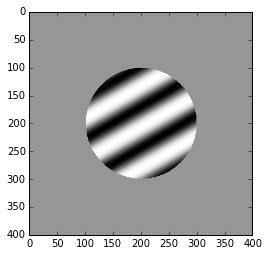

In [9]:
#compare grid = diskImg with grid = rectImg
%matplotlib inline
grid = diskImg
#grid = rectImg

fig = plt.figure()

def grating(x, y):
    temp = np.cos((2.*(np.pi)*freq)*(np.cos(theta)*x + np.sin(theta)*y))
    return temp

x = np.linspace(0, 2 * np.pi, xdim)
y = np.linspace(0, 2 * np.pi, ydim).reshape(-1, 1)

im = plt.imshow(grating(x, y), cmap=plt.get_cmap('Greys'))

def updatefig(*args):
    global x,y
    x += np.pi / 15.
#    im.set_array(grating(x,y)*diskImg)
    im.set_array(grating(x,y)*grid)
    return im

animation.FuncAnimation(fig, updatefig, interval=10, blit=False) # blit needs to be set to False

##Exercise: Try replacing the above diskImg mask with rectImg